In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [33]:
df = pd.read_parquet("../data/old_data/all_append_csv_12_25_2325i.gzip")
df.sample(10)

,제목,가사,장르
75118,내일의 내게 (DAY-D SOLO),허무한 하루 별 의미 없이 흘려보낸 날\n구름에 누워 아무 생각 없이 날렸어\n짙은...,록메탈
63191,언제나,I' always love you 너의 눈을 보고 있으면\nI'll always w...,록메탈
84008,Secret Christmas,수많은 사람들 수많은 이야기\n거리에 흘러나오는 그 캐롤까지도\n모두 다 행복해 매...,발라드
87323,Trap,나 모르게 소릴 질렀어\n전화기가 땀에 젖었어\n꿈이라고 믿기에는\n맘 한곳이 너무...,RNB
18512,"왜 불러 (With. 강혜연, 마리아)",Hey boy\nIt’s been a while\nWhy are you callin...,댄스
45394,눈에는 비,Now I ain’t going back to the time\r\n그땐 I had...,힙합
41403,원숭이띠 미혼남 (Feat. ZICO Of Block.B),원숭이띠 미혼남 (Feat. ZICO Of Block.B)\r\n\r\n가만히 거울...,힙합
94640,9,점은 점과 함께 던져 버렸고\n잔은 잔과 함께 던져 버렸고\n경은 경과 함께 던져 ...,록메탈
31562,한강,먼지처럼 쌓인 피곤함에\r\n주말엔 나는 누워있기 바빴었지\r\n내 방에 있는 게 ...,포크블루스
85870,Red Light,켜지는 Red Light\n낯선 이와의 밤에\n너의 자국을 지워\n리듬에 몸을 맞춰...,RNB


In [34]:
df["len"] = df["가사"].str.len()
df["word_count"] = df["가사"].map(lambda x : len(x.split()))

df["unique_word_count"] =  df["가사"].map(lambda x : len(set(x.split())))
df

,제목,가사,장르,len,word_count,unique_word_count
0,무지개 (Rainbow) (Feat. 조용휘),동그랗고 하얀 이마\n오똑한 반짝이는 코\n다갈색 눈동자 옆 살짝 보이는 점까지\n...,뮤지컬,363,106,76
1,나 주는 줄 알고 손 내밀었잖아,넌 밉고 난 쪽팔린다\n뭘 이런 걸 다 사 왔어 할지\n헉 뭐야 고마워 할지\n아이...,뮤지컬,659,197,115
2,너와나,이 땅위에 태어나 비로소 여기 있네\n우리 모두가 그리던 그 날\n바라고 바라던 꿈...,뮤지컬,233,55,35
3,나만의 언어 rep.,"(좋아)\n나는 널 이렇게 부를게\n(자유, 그래 자유)\n난 너를 이렇게 부를래\...",뮤지컬,376,106,84
4,여기는 엄마 컴퍼니,어떤 엄마를 원하십니까\n원하는 엄마를 고를 수 있는\n여기는 바로 바로 엄마컴퍼니...,뮤지컬,160,44,25
...,...,...,...,...,...,...
99823,Stargirl (2013 Ver.),처음엔 미처 몰랐어\n눈부신 사랑에 빠질 줄은\n멀리서 전학 온 이상한 아이가\n너...,록메탈,465,138,70
99824,사랑 아니었나,Du Du Du Du Du Du Du Du Du Du\nDu Du Du Du Du ...,록메탈,488,133,76
99825,아는 번호,오늘은 좀 어떠니\n여전히 또 울고 있니 넌\n듣게 될 줄 몰랐어\n그렇게 우는 널...,록메탈,337,107,72
99826,Try To Remember You,Try to remember you 네꿈 꾸고\n싶어서 난 자꾸 나가 오\n피곤해야...,록메탈,533,143,77


In [35]:
df_trot = df.loc[df['장르']=='트로트']
df_trot.reset_index(drop=True, inplace=True)
print(df_trot.shape)
df_trot.head()

(4848, 6)


,제목,가사,장르,len,word_count,unique_word_count
0,초혼,살아서는 갖지 못하는\n그런 이름 하나 때문에\n그리운 맘 눈물 속에\n난 띄워 보...,트로트,296,86,40
1,사랑아,안돼요 안돼 날 두고 떠나면 안돼\n그렇게 못해 난 절대 보낼 순 없어\n갈테면 가...,트로트,386,117,49
2,안동역에서,1.바람에 날려버린 허무한 맹세였나\n\n첫눈이 내리는 날 안동역 앞에서\n\n만나...,트로트,275,65,39
3,보릿고개,아야\n뛰지마라\n배 꺼질라\n가슴시린 보릿고갯길\n주린 배잡고\n물 한바가지\n배...,트로트,299,81,39
4,꽃,날 찾아 오신 내님 어서 오세요\n당신을 기다렸어요\n라이 라이야\n어서오세요 당신...,트로트,392,107,33


In [36]:
df_rm = df.loc[df['장르']=='록메탈']
df_rm.reset_index(drop=True, inplace=True)
print(df_rm.shape)
df_rm.head()

(20497, 6)


,제목,가사,장르,len,word_count,unique_word_count
0,흐려도 좋아,맨정신이 아니었었잖아\n네 얼굴 자세히 보고\n마음껏 이야기할래\n꿈에서도 꾸던 꿈...,록메탈,461,129,75
1,담다디,이상한 밤 그대가 다가오네요\n병든 내 모습을 봐\n가슴이 아파오길 바래요 바래요\...,록메탈,304,90,52
2,노를 저어라,고개를 들어라 눈을 떠라\n아침이 밝아오면\n눈부신 하늘과 맞닿은 곳\n그곳으로 갑...,록메탈,404,112,88
3,머물러줘 (SHINE Live Ending Finale Ver.),언젠가부터 힘에 겨워질 때마다\n눈에 눈물이 맺힐 때마다\n난 너를 떠올려\n가끔씩...,록메탈,845,246,88
4,너,너와 함께 길을 걷고\n너와 함께 마주 볼래\n밤이 아침이 될 때까지\n매일 너와 ...,록메탈,550,161,104


In [37]:
df_rnb = df.loc[df['장르']=='RNB']
df_rnb.reset_index(drop=True, inplace=True)
print(df_rnb.shape)
df_rnb.head()

(8559, 6)


,제목,가사,장르,len,word_count,unique_word_count
0,PSYCHO (Feat. Vahn of NINE.i),불이 꺼진 뒤에 시작되는 game\n시간이 지날수록 무뎌지는 pain\n의심 속에 ...,RNB,1059,249,116
1,밤의 안녕,어김없이 찾아온 이 밤과\n소란한 하루 끝\n너를 아프게 한 오늘은 오늘에게\n그대...,RNB,295,86,65
2,그대로 (With. 주그레이스),눈을 감아\n너에 대한 기억이\n내 속에서 희미해 질수록\n나는 널 더 깊이 이해해...,RNB,276,83,58
3,Running Out of Love (Feat. TRADE L),We’re going round and round\nround n round unt...,RNB,826,171,102
4,미어캣,세상이 조금씩 빨갛게\n물드는 시간이 될 때면\n넌 아무 말 없이\n창밖을 보았어\...,RNB,479,134,57


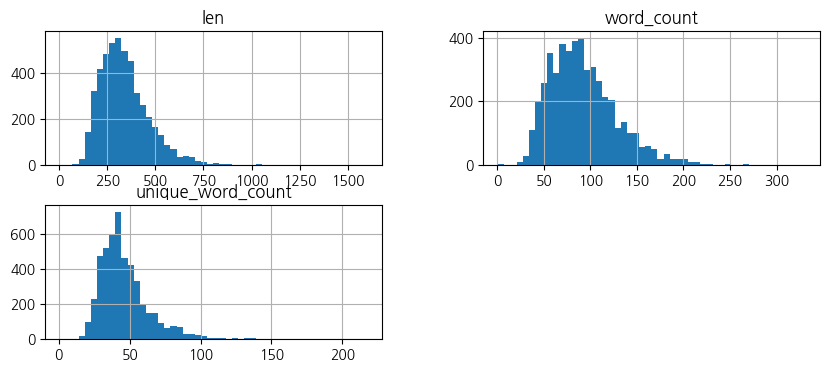

In [38]:
df_trot[["len", "word_count", "unique_word_count"]].hist(figsize=(10, 4), bins=50);

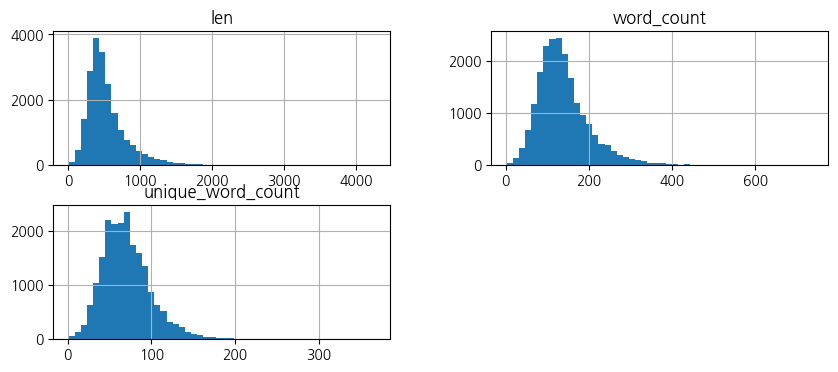

In [39]:
df_rm[["len", "word_count", "unique_word_count"]].hist(figsize=(10, 4), bins=50);

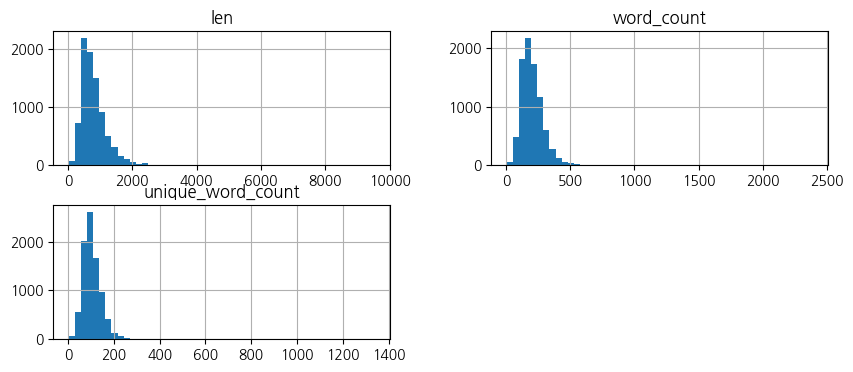

In [40]:
df_rnb[["len", "word_count", "unique_word_count"]].hist(figsize=(10, 4), bins=50);

In [41]:
df_trot[["len", "word_count", "unique_word_count"]].describe()

,len,word_count,unique_word_count
count,4848.000000,4848.000000,4848.000000
mean,341.422649,92.680899,46.594472
std,132.709081,37.219846,18.657549
min,6.000000,1.000000,1.000000
25%,249.750000,66.000000,34.000000
50%,320.000000,87.000000,43.000000
75%,406.000000,112.000000,53.250000
max,1596.000000,330.000000,217.000000


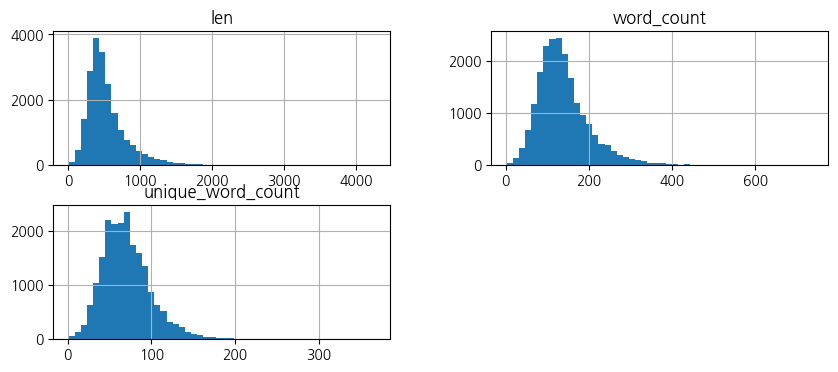

In [42]:
df_rm[["len", "word_count", "unique_word_count"]].hist(figsize=(10, 4), bins=50);

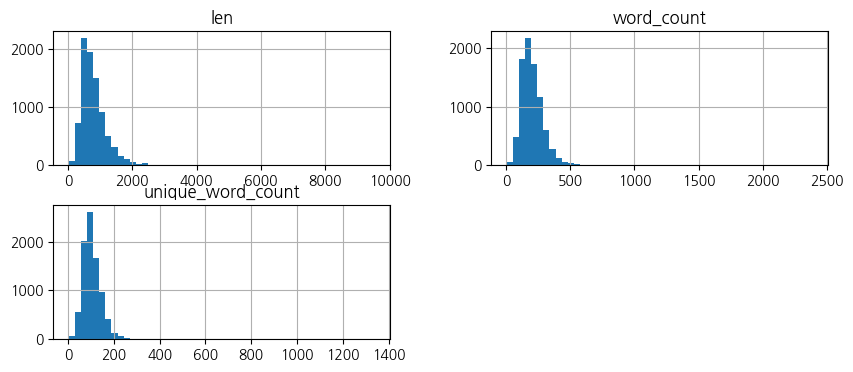

In [43]:
df_rnb[["len", "word_count", "unique_word_count"]].hist(figsize=(10, 4), bins=50);

In [44]:
df_trot[df_trot["len"] < 50]

,제목,가사,장르,len,word_count,unique_word_count
4092,돛을 올리다 (Intro),돛을 올리다,트로트,6,2,2
4746,새로운 항해... (Outro),우 우 우우우 우\n우우우우우우우 우우우우우,트로트,23,6,4


In [45]:
df_rm[df_rm["len"] < 50]

,제목,가사,장르,len,word_count,unique_word_count
22,오 최강삼성(Feat.유승준),오\n오\n오\n오\n최 강 삼 성 라이온즈\n화이팅\n오\n오\n오\n오\n최 강...,록메탈,49,20,7
144,Power Medley,Bad Boy Bad Boy\nBad Boy Bad Boy\nHa Ha Ha Ha Oh~,록메탈,47,13,4
1820,우리 비 그치면 산책할까?,나나나나- 나나나- 나나나-\n나나나나- 나나나- 나나나-,록메탈,31,6,2
3356,해몽,잠에서 깨면 그제야 알게 돼\n꿈이었음을\n떠나가면 그제야 알게 돼\n사람의 의미를,록메탈,43,12,9
4231,ただ,ただもっとあいいたかった\nだからそうしたんだ,록메탈,22,2,2
4833,Anything Else,마법처럼 시간이 멈춰\n마법처럼 시간이 멈춰\n마법처럼 시간이 멈춰,록메탈,35,9,3
6340,붉은하늘,늘 생각해\n붉게 물든 하늘 넘어\n닿을 수 없는 곳으로\n날아가는 모습을,록메탈,38,12,12
6367,집,"""여름날 나의 아버지는\n나의 얼굴을 잊지 않기 위해\n나를 쳐다보고 있었다고 말했다.""",록메탈,47,12,11
6530,박한이 응원가 2,삼성의 박한이 워어어어\n박 한 이 날려버려\n삼성의 박한이 워어어어\n박 한 이 ...,록메탈,47,14,7
6557,소멸의 소실,kimino sobani iruto bokuha,록메탈,26,4,4


In [46]:
df_rnb[df_rnb["len"] < 50]

,제목,가사,장르,len,word_count,unique_word_count
449,이태원성가,I’m sorrow I’m sorrow\nI’m condolence,RNB,36,6,3
3654,Not to see you again.,i hope your everything goes well,RNB,32,6,6
4682,숨겨둔 편지 (empty ver.),숨겨둔 편지를 찾았길 바라요.,RNB,16,4,4


In [47]:
songs = []
for genre in ['발라드', '댄스', '포크블루스', '힙합', '트로트', '록메탈', 'RNB']:
    df_sample = df.loc[df['장르']==genre].sample(500)
    print(genre, " shape : ", df_sample.shape)
    songs.append(df_sample)
# df.장르.unique()

발라드  shape :  (500, 6)
댄스  shape :  (500, 6)
포크블루스  shape :  (500, 6)
힙합  shape :  (500, 6)
트로트  shape :  (500, 6)
록메탈  shape :  (500, 6)
RNB  shape :  (500, 6)


In [48]:
all_500 = pd.concat(songs)
print(all_500.shape)
all_500.reset_index(drop=True, inplace=True)
all_500.tail()

(3500, 6)


,제목,가사,장르,len,word_count,unique_word_count
3495,"About You (Feat. K.vsh, OLNL)",많은 사람들과\n너에 관한 얘기를 해보고\n그럴수록 네게 해줬던\n그 어떤 많은 것...,RNB,1067,310,188
3496,UPSIDE DOWNSIDE,우린 Upside Downside\n우린 Upside Downside\n우린 Ups...,RNB,955,210,92
3497,Lost,알 수 없는 길 위에\n지금 막 꿈에서 깬듯해\n나도 몰래 소리쳤는데\n눈길 하나 ...,RNB,635,160,102
3498,Walkin',딱히 갈 데도 없고\n먹고 싶은 것도 없어\n차를 몰고 밖에 나가\n목적지는 나도 ...,RNB,821,198,105
3499,괜찮아도 괜찮아 (That's okay) (Inst.),숱하게 스쳐간\n감정들에 무뎌지는 감각\n언제부턴가 익숙해져버린\n마음을 숨기는 법...,RNB,807,229,158


In [49]:
all_500.장르.unique()

['발라드', '댄스', '포크블루스', '힙합', '트로트', '록메탈', 'RNB']
Categories (9, object): ['RNB', '댄스', '동요', '록메탈', ..., '발라드', '트로트', '포크블루스', '힙합']

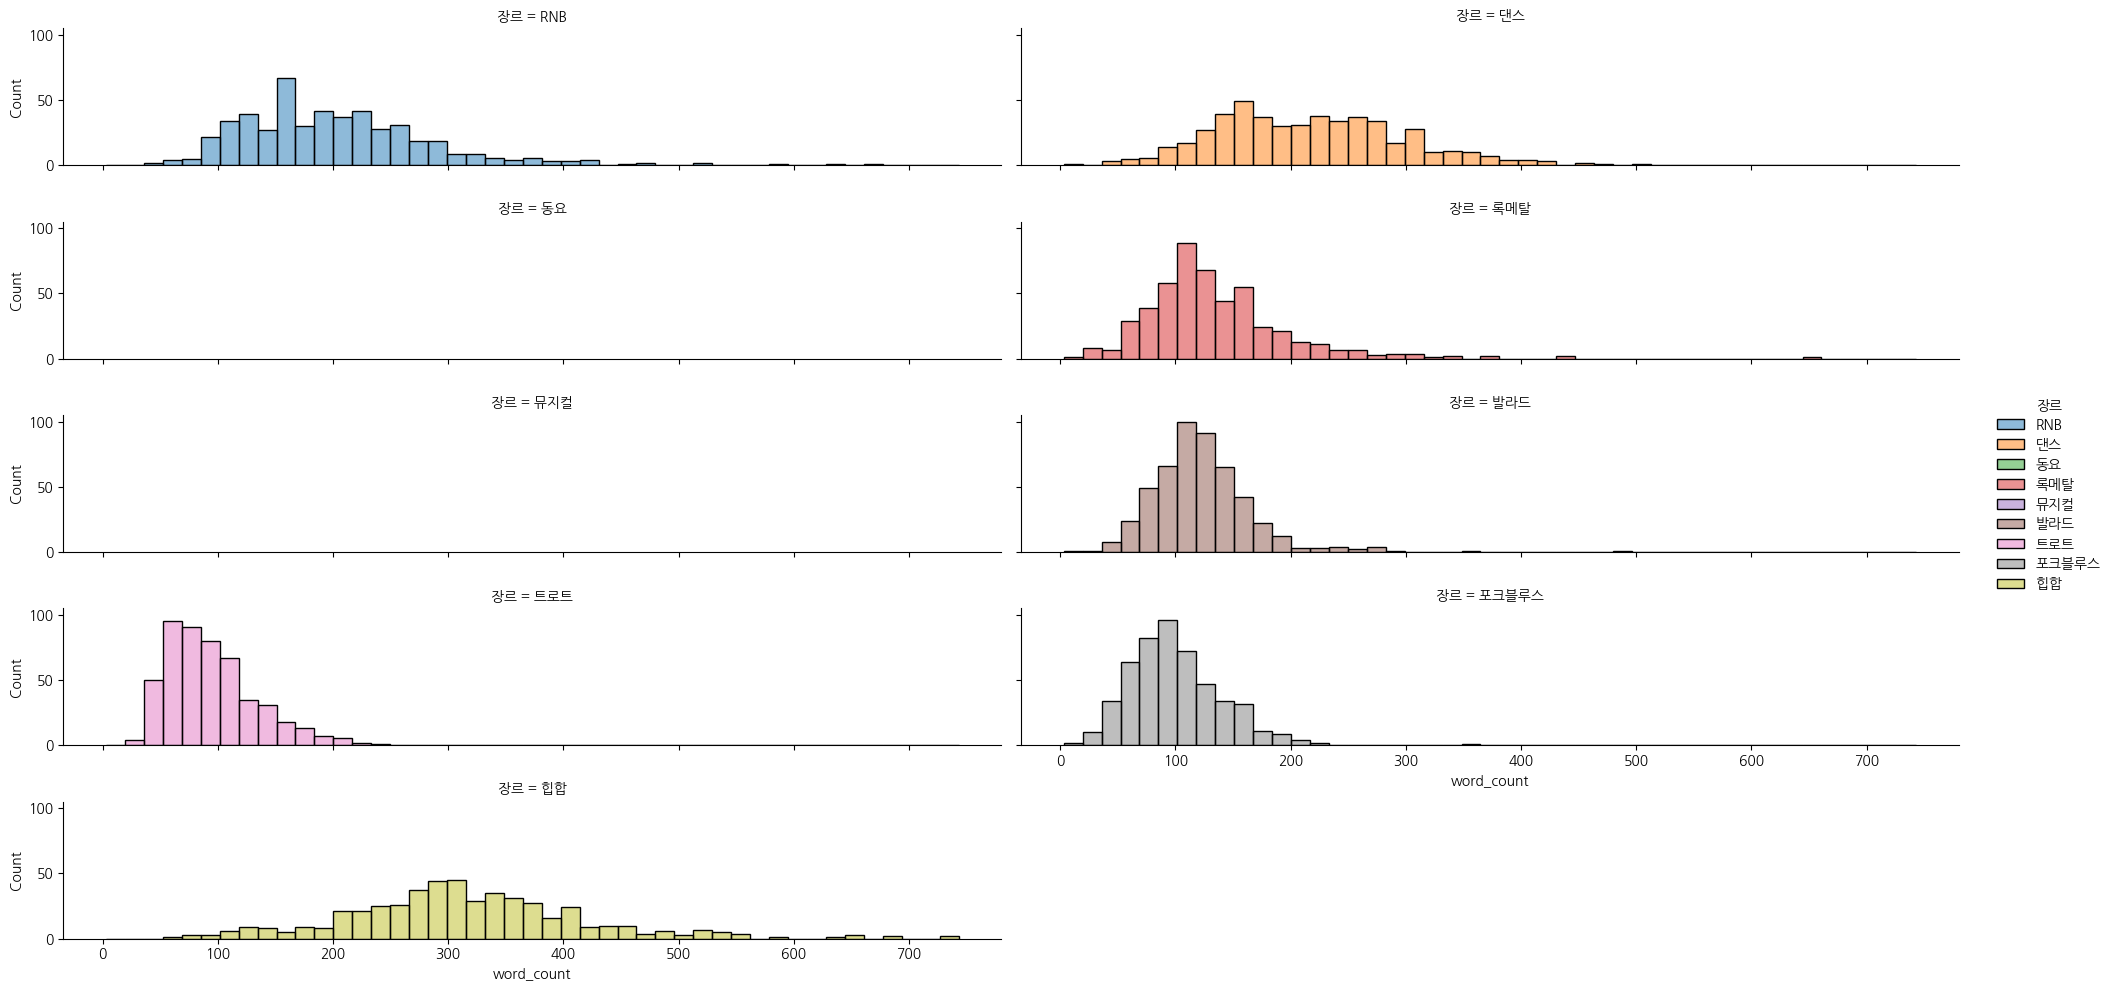

In [50]:
sns.displot(data=all_500, x="word_count", hue=all_500.장르,
            col=all_500.장르, col_wrap=2, aspect=5, height=2)

In [51]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer

In [52]:
tfidf = TfidfVectorizer(max_features=500)
tdm = tfidf.fit_transform(df_trot['가사'])

cv = CountVectorizer(max_features=500)
tdm2 = cv.fit_transform(df_trot['가사'])

word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    'tf-idf': tdm.sum(axis=0).flat
})

word_count.sort_values('tf-idf', ascending=False).head(10)

,단어,tf-idf
242,사랑,171.634695
74,나는,166.055531
44,그대,153.005293
92,내가,142.856154
76,나를,140.684903
237,사람,129.801442
83,나의,121.774531
126,다시,120.563315
166,마음,102.295648
351,없는,102.073937


In [53]:
tfidf = TfidfVectorizer(max_features=500)
tdm = tfidf.fit_transform(df_rm['가사'])

cv = CountVectorizer(max_features=500)
tdm2 = cv.fit_transform(df_rm['가사'])

word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    'tf-idf': tdm.sum(axis=0).flat
})

word_count.sort_values('tf-idf', ascending=False).head(10)

,단어,tf-idf
158,you,987.744485
238,너의,714.959358
217,나를,711.908027
222,나의,706.279268
226,내가,679.953483
215,나는,644.458645
125,the,616.818219
254,다시,608.662583
232,너를,595.476950
408,없는,522.749971


In [54]:
tfidf = TfidfVectorizer(max_features=500)
tdm = tfidf.fit_transform(df_rnb['가사'])

cv = CountVectorizer(max_features=500)
tdm2 = cv.fit_transform(df_rnb['가사'])

word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    'tf-idf': tdm.sum(axis=0).flat
})

word_count.sort_values('tf-idf', ascending=False).head(10)

,단어,tf-idf
219,you,823.540282
113,me,418.564483
109,love,370.625958
178,the,360.824102
119,my,332.429456
90,it,319.009285
133,oh,298.092573
187,to,288.158491
16,baby,285.079024
284,너의,282.990120
